# State feedback design for the Apollo moon lander
which has similar dynamics as a quadcopter

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import control as cm
sy.init_printing()
%matplotlib notebook

In [13]:
k1, k2, h = sy.symbols('k1, k2, h', real=True, positive=True)
s = sy.symbols('s', real=True)
z = sy.symbols('z', real=False)

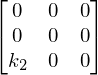

In [4]:
A = sy.Matrix([[0,0,0], [1,0,0], [0,k2,0]])
A*A

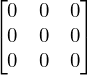

In [5]:
A*A*A

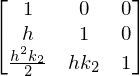

In [14]:
Phi = sy.eye(3) + A*h+ A*A*h**2/2
Phis = sy.eye(3) + A*s+ A*A*s**2/2
Phi

In [8]:
B = sy.Matrix([[k1],[0],[0]])

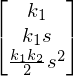

In [15]:
Phis*B

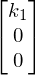

In [11]:
B

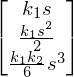

In [17]:
sy.integrate(Phis*B, s)